#### Import Libraries and Dataset

In [56]:
#Libraries and environment
import os
os.chdir(r'C:\Users\MAIN\Desktop\Data Science intern File')
os.getcwd()

#import packages
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.interactive(False)
import seaborn as sns
plt.style.use("ggplot")
%matplotlib inline
from pylab import rcParams
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [57]:
#import dataset
df = pd.read_csv("data.csv", na_values= " ")
print(df.shape)
print(list(df.columns))

C:\Users\MAIN\AnacondaProjects\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(392892, 15)
['fullVisitorID', 'visitNumber', 'date', 'bounces', 'hits', 'pageviews', 'timeOnSite', 'transactionRevenue', 'transactions', 'source', 'channelGrouping', 'browser', 'deviceCategory', 'country', 'city']


In [58]:
#basic dataset exploration
print(df.head(n=5)) 
print(df.describe())  
print(df.dtypes)  #datatypes of the individual columns

         fullVisitorID  visitNumber      date  bounces  hits  pageviews  \
0  8533875475515924645            1  20170205      1.0     1        1.0   
1  4874599869430831185            2  20170205      1.0     1        1.0   
2   361954421372951638            1  20170205      1.0     1        1.0   
3  8751850432978942600            2  20170205      1.0     1        1.0   
4  2451058030378352110            1  20170205      1.0     1        1.0   

   timeOnSite  transactionRevenue  transactions    source channelGrouping  \
0         NaN                 NaN           NaN  (direct)  Organic Search   
1         NaN                 NaN           NaN  (direct)  Organic Search   
2         NaN                 NaN           NaN  (direct)  Organic Search   
3         NaN                 NaN           NaN      bing  Organic Search   
4         NaN                 NaN           NaN  (direct)  Organic Search   

  browser deviceCategory        country                           city  
0  Chrome    

## Exploratory Data Analysis

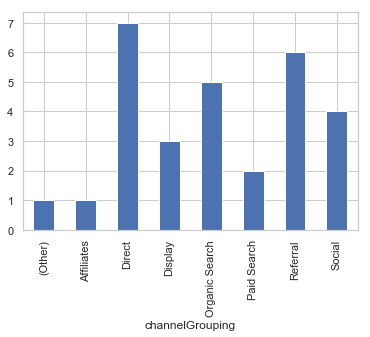

In [59]:
#Channel with the highest number of transactions
df.groupby('channelGrouping')['transactions'].nunique().plot(kind='bar')
plt.show()

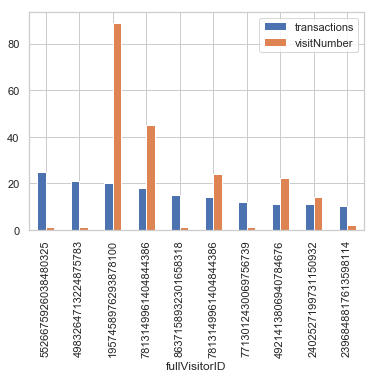

In [60]:
#Top visitors with highest transaction numbers and number of visits. No strong correlation between sum transactions and number of visits
df.groupby(['fullVisitorID']).agg({'transactions':'sum', 'visitNumber':'count'}).sort_values(by= ['transactions','visitNumber'], ascending=False)[:10].plot(kind='bar')

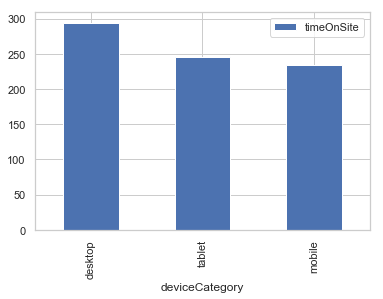

In [61]:
#Device type with highest average timeOnsite
#there is a need to optimise the website mobile and tablet view so its easier to scroll through the products online annd 
df.groupby(['deviceCategory']).agg({'timeOnSite':'mean'}).sort_values(by= ['timeOnSite'], ascending=False).plot(kind='bar')
plt.show()

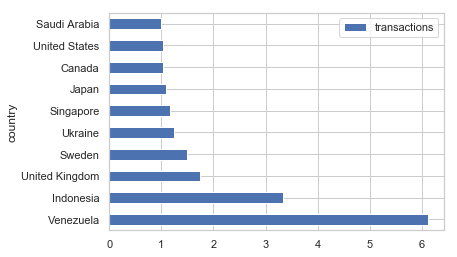

In [62]:
#Top countries with highest mean number of transactions
df.groupby(['country']).agg({'transactions':'mean'}).sort_values(by= ['transactions'], ascending=False)[:10].plot(kind='barh')

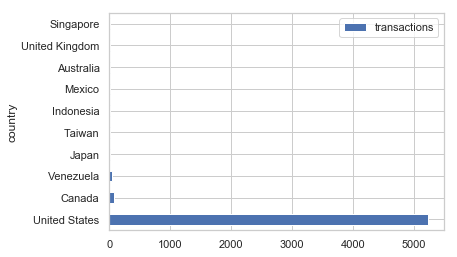

In [63]:
#Top countries with highest number of transactions
df.groupby(['country']).agg({'transactions':'sum'}).sort_values(by= ['transactions'], ascending=False)[:10].plot(kind='barh')

In [64]:
df.groupby('deviceCategory').mean()

,visitNumber,date,bounces,hits,pageviews,timeOnSite,transactionRevenue,transactions
deviceCategory,,,,,,,,
desktop,2.703157,2.017036e+07,1.0,4.758731,4.021520,294.085182,172.637229,1.051175
mobile,1.635644,2.017037e+07,1.0,3.621706,3.183043,234.648228,62.964645,1.014670
tablet,1.612387,2.017036e+07,1.0,4.098486,3.629006,244.911757,60.288033,1.000000


In [65]:
df.groupby('channelGrouping').mean()

,visitNumber,date,bounces,hits,pageviews,timeOnSite,transactionRevenue,transactions
channelGrouping,,,,,,,,
(Other),4.513274,2.017040e+07,1.0,4.610619,3.849558,226.781250,11.990000,1.000000
Affiliates,1.792703,2.017037e+07,1.0,2.890165,2.540210,331.921592,20.480000,1.000000
Direct,2.609688,2.017037e+07,1.0,4.345957,3.720820,295.157086,219.199933,1.090562
Display,14.942524,2.017032e+07,1.0,6.386408,5.318835,328.412415,1863.974844,1.093750
Organic Search,2.035613,2.017038e+07,1.0,4.350251,3.722361,271.529078,104.146220,1.027044
Paid Search,2.669482,2.017038e+07,1.0,5.655901,4.796091,282.978053,108.545000,1.010309
Referral,3.285247,2.017038e+07,1.0,6.917998,5.744812,314.527635,137.905217,1.038595
Social,1.753364,2.017031e+07,1.0,2.249818,2.048685,176.310794,75.345775,1.239437


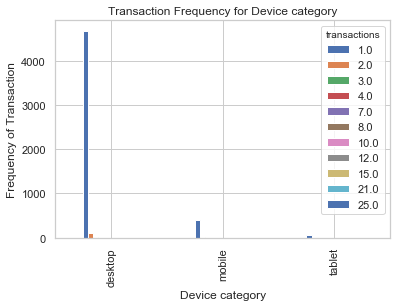

In [66]:
%matplotlib inline
pd.crosstab(df.deviceCategory,df.transactions).plot(kind='bar')
plt.title('Transaction Frequency for Device category')
plt.xlabel('Device category')
plt.ylabel('Frequency of Transaction')
plt.savefig('transaction_fre_device')

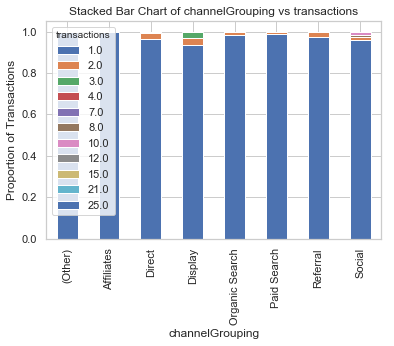

In [67]:
table=pd.crosstab(df.channelGrouping,df.transactions)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of channelGrouping vs transactions')
plt.xlabel('channelGrouping')
plt.ylabel('Proportion of Transactions')
plt.savefig('channelGrp_vs_trn_stack')

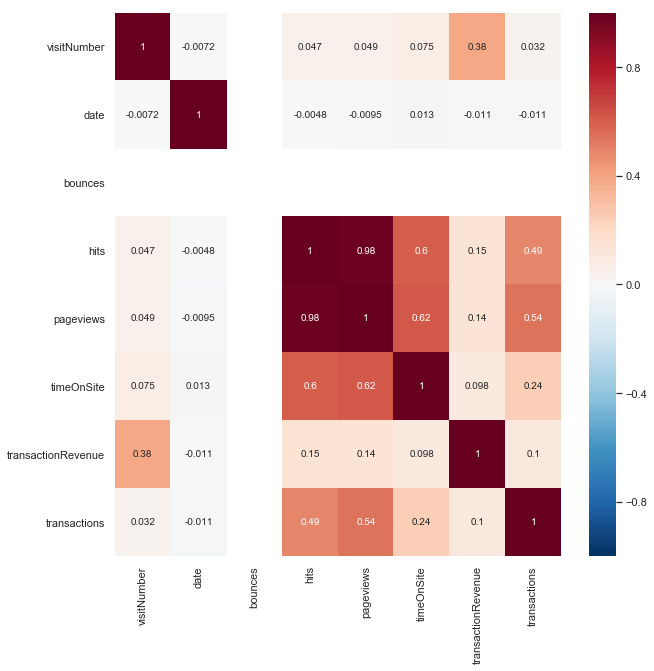

In [68]:
#check correlation with seaborn heatmap
sns.set_style("whitegrid")
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap='RdBu_r', annot=True, vmax=1, vmin=-1)
plt.show()

## Modeling

#### check missing values for each column

In [69]:
df.isnull().sum().sort_values(ascending=False)

transactions          387615
transactionRevenue    387615
bounces               196928
timeOnSite            196493
pageviews                 36
city                       0
country                    0
deviceCategory             0
browser                    0
channelGrouping            0
source                     0
hits                       0
date                       0
visitNumber                0
fullVisitorID              0
dtype: int64

#### Handling missing values
fill the transacion and transactionRevenue with 0. this is because we want to run a logistic regression on the conversion 
and the transaction column will be used to create the conversion column. The transactionRevenue column missing values matches
that of the tranactions showing the abscence of transactions resulted in abscence of revenue. therefore we fill 
the transactionRevenue with 0. We fill the pageviews column with the mean of the values since the number of missing values
is very negligible. We also fill the missing values of bounces and the timeOnSite missing values with 0.

In [70]:
df.head()

,fullVisitorID,visitNumber,date,bounces,hits,pageviews,timeOnSite,transactionRevenue,transactions,source,channelGrouping,browser,deviceCategory,country,city
0,8533875475515924645,1,20170205,1.0,1,1.0,NaN,NaN,NaN,(direct),Organic Search,Chrome,desktop,Australia,Sydney
1,4874599869430831185,2,20170205,1.0,1,1.0,NaN,NaN,NaN,(direct),Organic Search,Chrome,mobile,Turkey,Istanbul
2,361954421372951638,1,20170205,1.0,1,1.0,NaN,NaN,NaN,(direct),Organic Search,Chrome,desktop,Russia,Moscow
3,8751850432978942600,2,20170205,1.0,1,1.0,NaN,NaN,NaN,bing,Organic Search,Edge,desktop,United States,not available in demo dataset
4,2451058030378352110,1,20170205,1.0,1,1.0,NaN,NaN,NaN,(direct),Organic Search,Chrome,desktop,Indonesia,not available in demo dataset


In [71]:
df['transactions'] = df['transactions'].fillna(0)
df['transactionRevenue'] = df['transactionRevenue'].fillna(0)
df['bounces'] = df['bounces'].fillna(0)
df['timeOnSite'] = df['timeOnSite'].fillna(0)
df['pageviews'].fillna(int(df['pageviews'].mean()), inplace=True)
df.isnull().sum().sort_values(ascending=False)

city                  0
country               0
deviceCategory        0
browser               0
channelGrouping       0
source                0
transactions          0
transactionRevenue    0
timeOnSite            0
pageviews             0
hits                  0
bounces               0
date                  0
visitNumber           0
fullVisitorID         0
dtype: int64

In [72]:
df.shape

(392892, 15)

#### Feature engineering

create a new column to show if there is conversion from the web visit and session. This will be our predctive variable

In [73]:
df['conversion'] = np.where(df.transactions > 0, 1, 0)
df.conversion.value_counts()

0    387615
1      5277
Name: conversion, dtype: int64

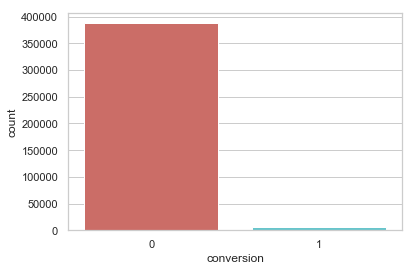

<Figure size 432x288 with 0 Axes>

In [74]:
#Histogram of the categorical variable showing the distribution of the different classes. A close look reveals a notable class imbalance.
sns.countplot(x='conversion',data=df, palette='hls')
plt.show()
plt.savefig('count_plot')

In [75]:
df.shape

(392892, 16)

In [76]:
#Calculate percentage of transaction vs nontransaction values
count_no_trn = len(df[df['conversion']==0])
count_trn = len(df[df['conversion']==1])
pct_of_no_trn = count_no_trn/(count_no_trn+count_trn)
print("percentage of no transaction is", pct_of_no_trn*100)
pct_of_trn = count_trn/(count_no_trn+count_trn)
print("percentage of transaction", pct_of_trn*100)

percentage of no transaction is 98.65688280748908
percentage of transaction 1.343117192510919


In [77]:
df.groupby('conversion').mean()

,visitNumber,date,bounces,hits,pageviews,timeOnSite,transactionRevenue,transactions
conversion,,,,,,,,
0,2.328886,2.017037e+07,0.505564,4.033177,3.472492,126.548124,0.000000,0.000000
1,4.734698,2.017039e+07,0.000000,32.391700,25.693386,1007.880235,162.838217,1.047754


In [78]:
df.dtypes

fullVisitorID          object
visitNumber             int64
date                    int64
bounces               float64
hits                    int64
pageviews             float64
timeOnSite            float64
transactionRevenue    float64
transactions          float64
source                 object
channelGrouping        object
browser                object
deviceCategory         object
country                object
city                   object
conversion              int32
dtype: object

##### Mapping of categorical variables

#### create Dummy variables

In [79]:
cat_vars=['source','channelGrouping','browser','deviceCategory','country','city']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    df1=df.join(cat_list)
    df=df1
cat_vars=['source','channelGrouping','browser','deviceCategory','country','city']
df_vars=df.columns.values.tolist()
to_keep=[i for i in df_vars if i not in cat_vars]

In [80]:
df_final=df[to_keep]
df_final.columns.values

array(['fullVisitorID', 'visitNumber', 'date', 'bounces', 'hits',
       'pageviews', 'timeOnSite', 'transactionRevenue', 'transactions',
       'conversion', 'source_(direct)', 'source_(not set)',
       'source_9to5google.com', 'source_Partners',
       'source_ad.doubleclick.net', 'source_admin.globalaccess.com',
       'source_adwords.google.com', 'source_amazon.com',
       'source_analytics.google.com', 'source_aol',
       'source_apis.mail.yahoo.com', 'source_ask',
       'source_au.search.yahoo.com', 'source_aulagrado.esic.edu',
       'source_ausdroid.net', 'source_away.vk.com', 'source_baidu',
       'source_baidu.com', 'source_basecamp.com', 'source_bing',
       'source_bing.com', 'source_blackboard.towson.edu',
       'source_blog.golang.org', 'source_blognone.com',
       'source_br.pinterest.com', 'source_br.search.yahoo.com',
       'source_businessinsider.com', 'source_businessinsider.in',
       'source_ca.search.yahoo.com', 'source_cc.csusm.edu',
       'source_cent

#### Define the Variables

In [81]:
X = df_final.loc[:, df_final.columns != 'conversion']
y = df_final.loc[:, df_final.columns == 'conversion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

#### Standard Scaling

In [82]:
#import normalisation package for scaling and sacle the independent variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Oversampling Using SMOTE

###### oversampling was used to take care of the massive class imbalance in the target variable

In [ ]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
os_df_X,os_df_y=os.fit_resample(X_train, y_train)
os_df_X = pd.DataFrame(data=os_df_X,columns=columns )
os_df_y= pd.DataFrame(data=os_df_y,columns=['conversion'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_df_X))
print("Number of no transactions in oversampled data",len(os_df_y[os_df_y['conversion']==0]))
print("Number of transactions",len(os_df_y[os_df_y['conversion']==1]))
print("Proportion of no transactions data in oversampled data is ",len(os_df_y[os_df_y['conversion']==0])/len(os_df_X))
print("Proportion of transaction data in oversampled data is ",len(os_df_y[os_df_y['conversion']==1])/len(os_df_X))

#### Apply LDA(Linear Discriminant Analysis)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

#### Logistic Regression Model Fitting

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#### predict Test result and calculate Accuracy

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

#### Confusion Matrix to check Accuracy

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

#### compute Precision, Recall, F1-score

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#### ROC Curve

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

plt.title('Logistic Regression (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

In [ ]:
#split data into X and Y
X=df.drop(['conversion'],axis=1)
y=df.conversion

In [ ]:
#Use Pearson Correlation to drop features from the X independent variables
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
#with the following function we select highly correlated features and remove the first feature that is correlated with any other feature
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X, 0.70)
len(set(corr_features))

In [ ]:
corr_features

In [ ]:
X = X.drop(corr_features,axis=1)

In [ ]:
X.dtypes

In [ ]:
#import normalisation package for scaling and sacle the independent variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
#split train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

In [ ]:
#import Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [ ]:
LogR = LogisticRegression()
RanR = RandomForestClassifier()
svC = SVC(kernel='rbf')

In [ ]:
#train our classifier
LogR.fit(X_train,y_train)
RanR.fit(X_train,y_train)
svC.fit(X_train,y_train)

In [ ]:
#predictions for test
y_pred1 = LogR.predict(X_test)
y_pred2 = RanR.predict(X_test)
y_pred3 = svC.predict(X_test)

### Evaluation

In [ ]:
#check accuracy. Classifier performance on test
print(LogR.score(X_test,y_test))
print(RanR.score(X_test,y_test))
print(svC.score(X_test,y_test))

In [ ]:
#import performance measure tools and check confusion matrix
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score
cm1 = confusion_matrix(y_test,y_pred1)
cm2 = confusion_matrix(y_test,y_pred2)
cm3 = confusion_matrix(y_test,y_pred3)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred2))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred3))

In [ ]:
#check Gridsearch for model2 = RandomForest
param_dict= {'n_estimators':range(2,10), 'max_depth':range(1,10)}
model = GridSearchCV(RanR,param_dict)
model.fit(X_train,y_train)

model.score(X_test,y_test)
model.best_params_